# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [25]:
# Import required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [26]:
# Import whale_navs data and read CSV file setting the DatetimeIndex 
whale_navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col = "date",
    parse_dates = True,
    infer_datetime_format = True)

# Review first 5 rows of DataFrame
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [27]:
# Prepare analysis by converting dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_daily_returns_df = whale_navs_df.pct_change().dropna()

# Review first five rows of daily returns DataFrame
whale_navs_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Data: late 2014-late 2020; SOROS, PAULSON, TIGER, BERKSHIRE, S&P500'}, xlabel='date'>

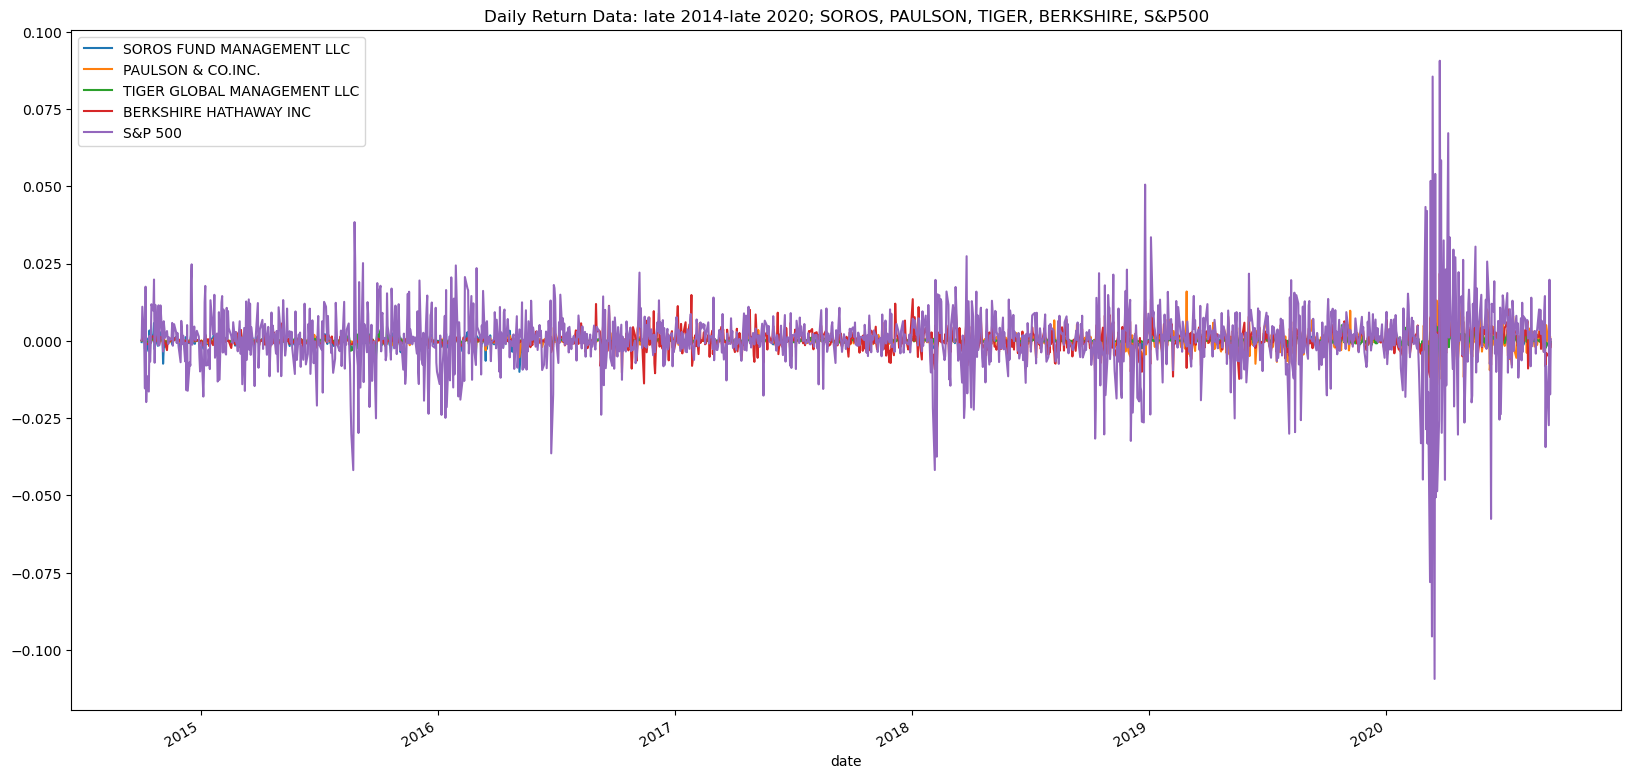

In [28]:
# Plot daily return data of 4 funds and S&P 500 
# Include title parameter and adjust figure size
whale_navs_daily_returns_df.plot(figsize=(20,10), title="Daily Return Data: late 2014-late 2020; SOROS, PAULSON, TIGER, BERKSHIRE, S&P500") 

<AxesSubplot:title={'center':'Daily Return Data - SOROS'}, xlabel='date'>

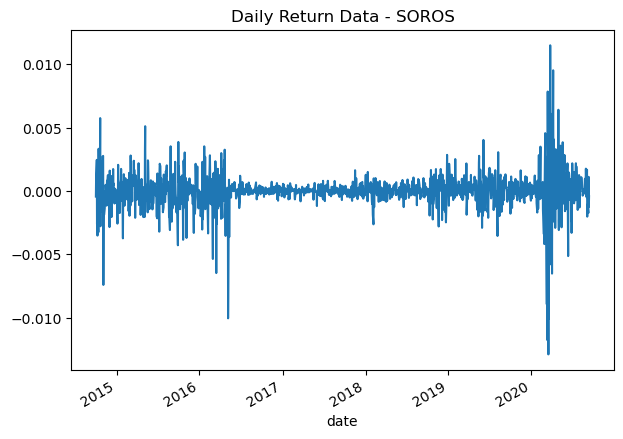

In [29]:
# Plot Soros for better visualization if needed
whale_navs_daily_returns_df["SOROS FUND MANAGEMENT LLC"].plot(figsize=(7,5), title="Daily Return Data - SOROS")

<AxesSubplot:title={'center':'Daily Return Data - PAULSON'}, xlabel='date'>

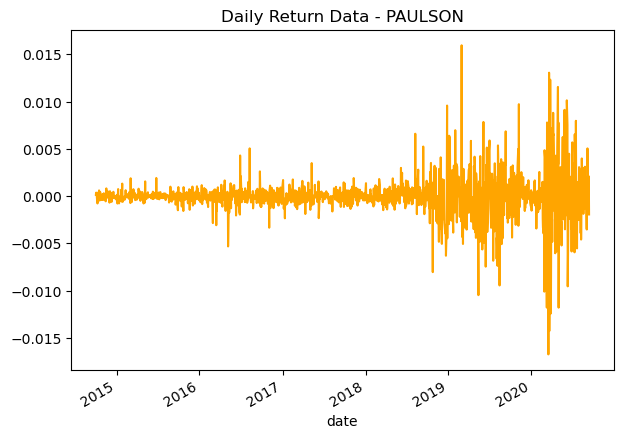

In [30]:
# Plot Paulson for better visualization if needed
whale_navs_daily_returns_df["PAULSON & CO.INC."].plot(figsize=(7,5), title="Daily Return Data - PAULSON", color="orange")

<AxesSubplot:title={'center':'Daily Return Data - TIGER'}, xlabel='date'>

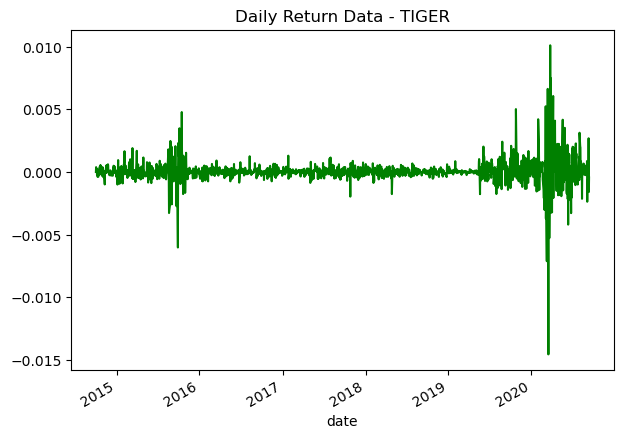

In [31]:
# Plot Tiger for better visualization if needed
whale_navs_daily_returns_df["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize=(7,5), title="Daily Return Data - TIGER", color="green")

<AxesSubplot:title={'center':'Daily Return Data - BERKSHIRE'}, xlabel='date'>

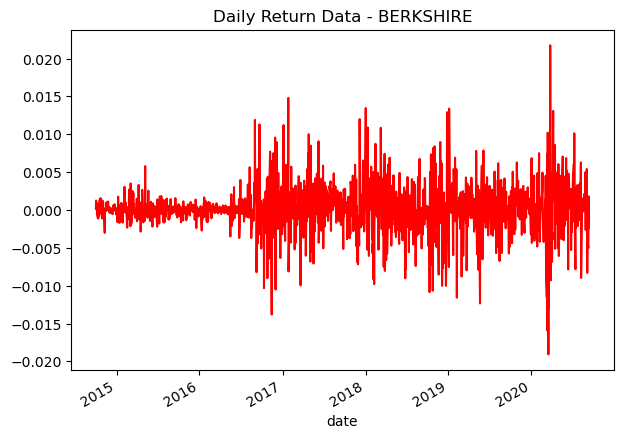

In [32]:
# Plot Berkshire for better visualization if needed
whale_navs_daily_returns_df["BERKSHIRE HATHAWAY INC"].plot(figsize=(7,5), title="Daily Return Data - BERKSHIRE", color="red")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [33]:
# Calculate and plot cumulative returns of 4 fund portfolios and S&P 500
whale_navs_cumulative_returns_df = (1 + whale_navs_daily_returns_df).cumprod()

# Review last 5 rows of cumulative returns DataFrame
whale_navs_cumulative_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Return Data: late 2014-late 2020; SOROS, PAULSON, TIGER, BERKSHIRE, S&P500'}, xlabel='date'>

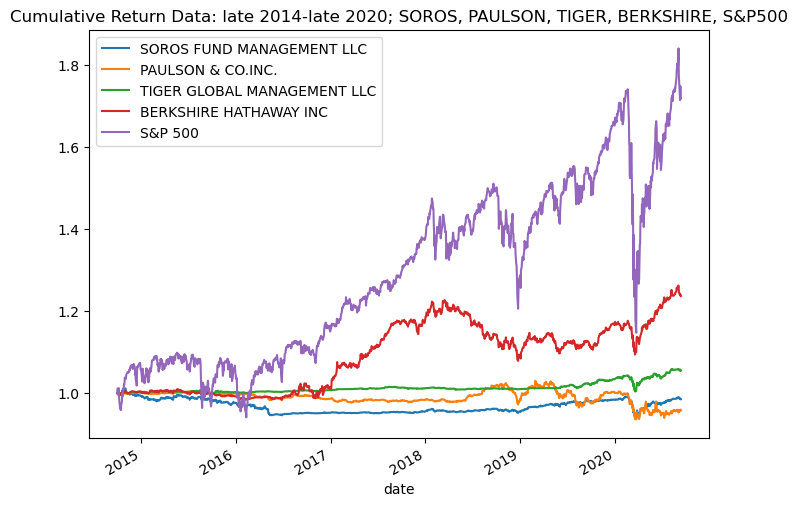

In [34]:
# Visualize cumulative returns using Pandas plot function
# Include title parameter and adjust figure size
whale_navs_cumulative_returns_df.plot(figsize=(8,6), title="Cumulative Return Data: late 2014-late 2020; SOROS, PAULSON, TIGER, BERKSHIRE, S&P500")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Based on the cumulative return data provided in the .tail() function, which shows the last 5 rows of all the data, S&P 500 index outperforms all four fund portfolios. However, when looking at the visual data that fact still stands mostly true, except for when looking at the data earlier on which seems to be late 2014-early 2016. During this time period, the S&P 500 index cumulative returns dips a handful of times far enough to where all four fund portfolios outperform it.  

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'SOROS FUND MANAGEMENT LLC'),
  Text(2, 0, 'PAULSON & CO.INC.'),
  Text(3, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
  Text(4, 0, 'BERKSHIRE HATHAWAY INC'),
  Text(5, 0, 'S&P 500')])

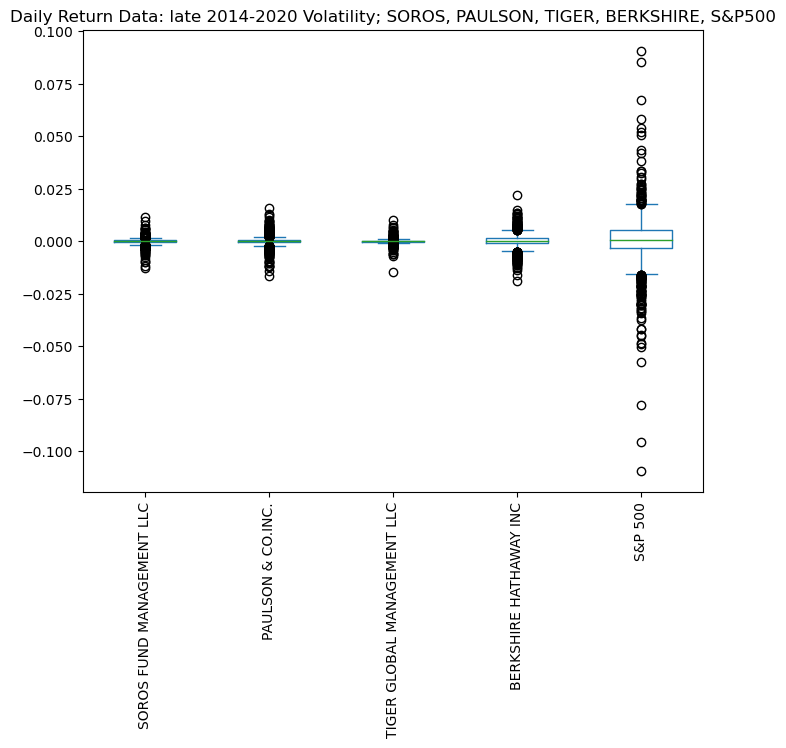

In [54]:
# Use daily return data to create box plots to visualize volatility of 4 funds and S&P 500 
# Include title parameter and adjust figure size
whale_navs_daily_returns_df.plot(kind="box", figsize=(8,6), title="Daily Return Data: late 2014-2020 Volatility; SOROS, PAULSON, TIGER, BERKSHIRE, S&P500")
plt.xticks(rotation="vertical")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Data: late 2014-2020 Volatility; SOROS, PAULSON, TIGER, BERKSHIRE'}>

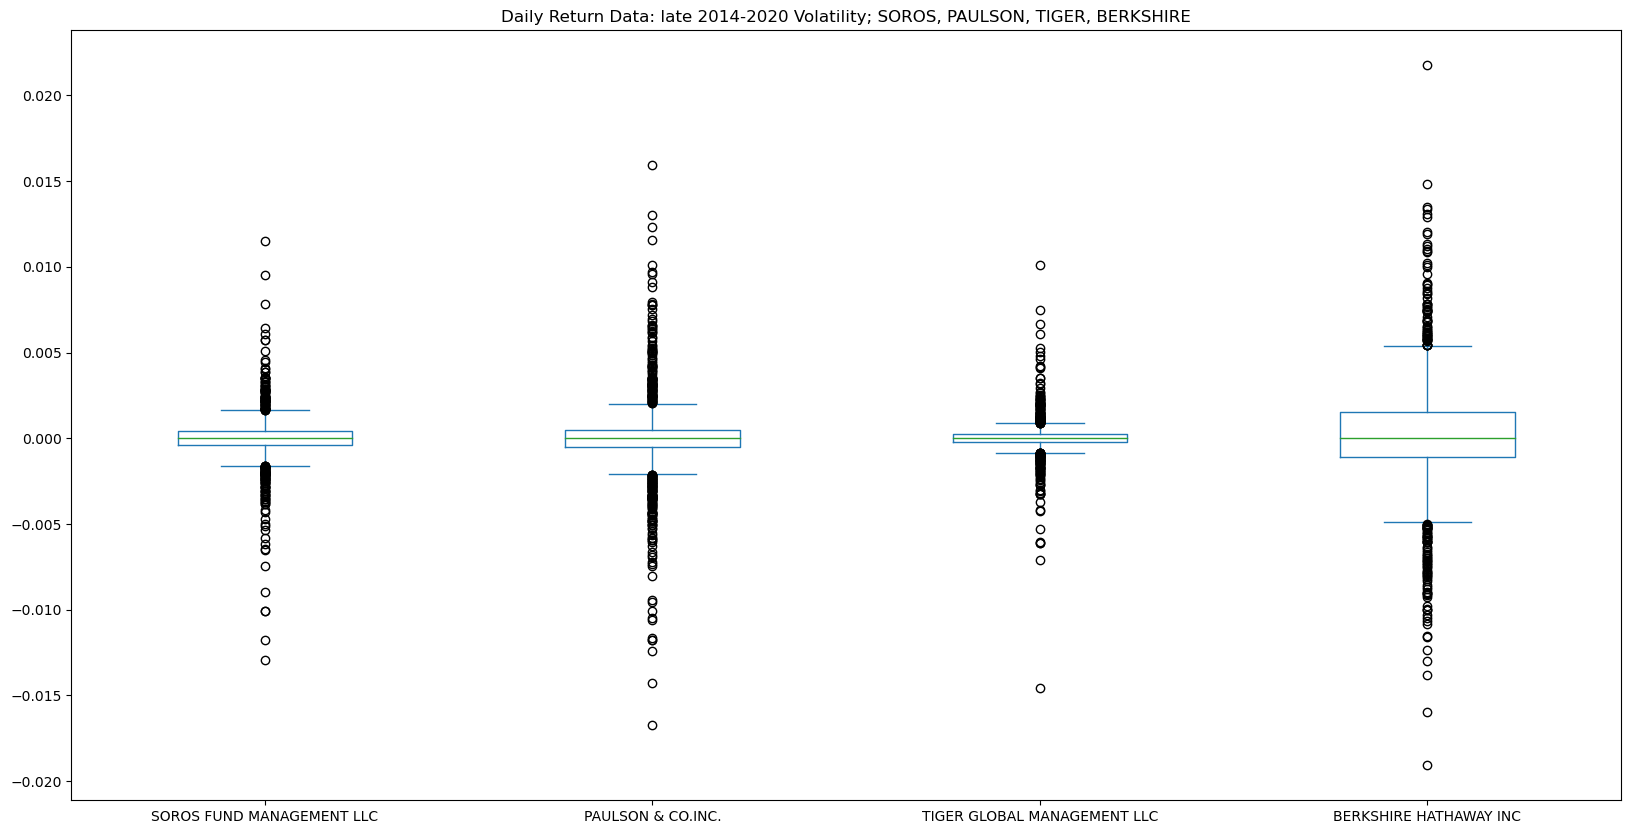

In [47]:
# Create new DataFrame containing only 4 fund portfolios by dropping S&P 500 column from DataFrame
# Create box plots to reflect return data for 4 fund portfolios
# Include title parameter and adjust figure size
four_fund_portfolios_df = whale_navs_daily_returns_df.drop(columns="S&P 500")
four_fund_portfolios_df.plot(kind="box", figsize=(20,10), title="Daily Return Data: late 2014-2020 Volatility; SOROS, PAULSON, TIGER, BERKSHIRE")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Based on the box plot visualization of just the four fund portfolios, the fund showing the greatest spread/volatilty is Berkshire Hathaway Inc. The interquatile range of this fund is the most spread out of the four funds, the range/spread of the vertical whiskers are the greatest of the four, and it has a couple of outliers but not the most of the four. Paulson & CO.Inc. has the most outliers of the four by far, making it somewhat worthy of notice for most volatilty. The fund showing the least spread/volatility would have to be Tiger Global Management LLC. It's interquartile range, whiskers, and argubaly so it's outliers, are the least of all four funds. 

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [37]:
# Calculate and sort standard deviation for 4 portfolios and S&P 500
whale_navs_std_df = whale_navs_daily_returns_df.std()

# Review the standard deviations sorted smallest to largest
whale_navs_std_df.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [38]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
whale_navs_annualized_std_df = whale_navs_std_df * np.sqrt(252)

# Review the annual standard deviations smallest to largest
whale_navs_annualized_std_df.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21 Day Rolling Window Standard Deviations - Four Fund Portfolios and S&P 500 Index'}, xlabel='date'>

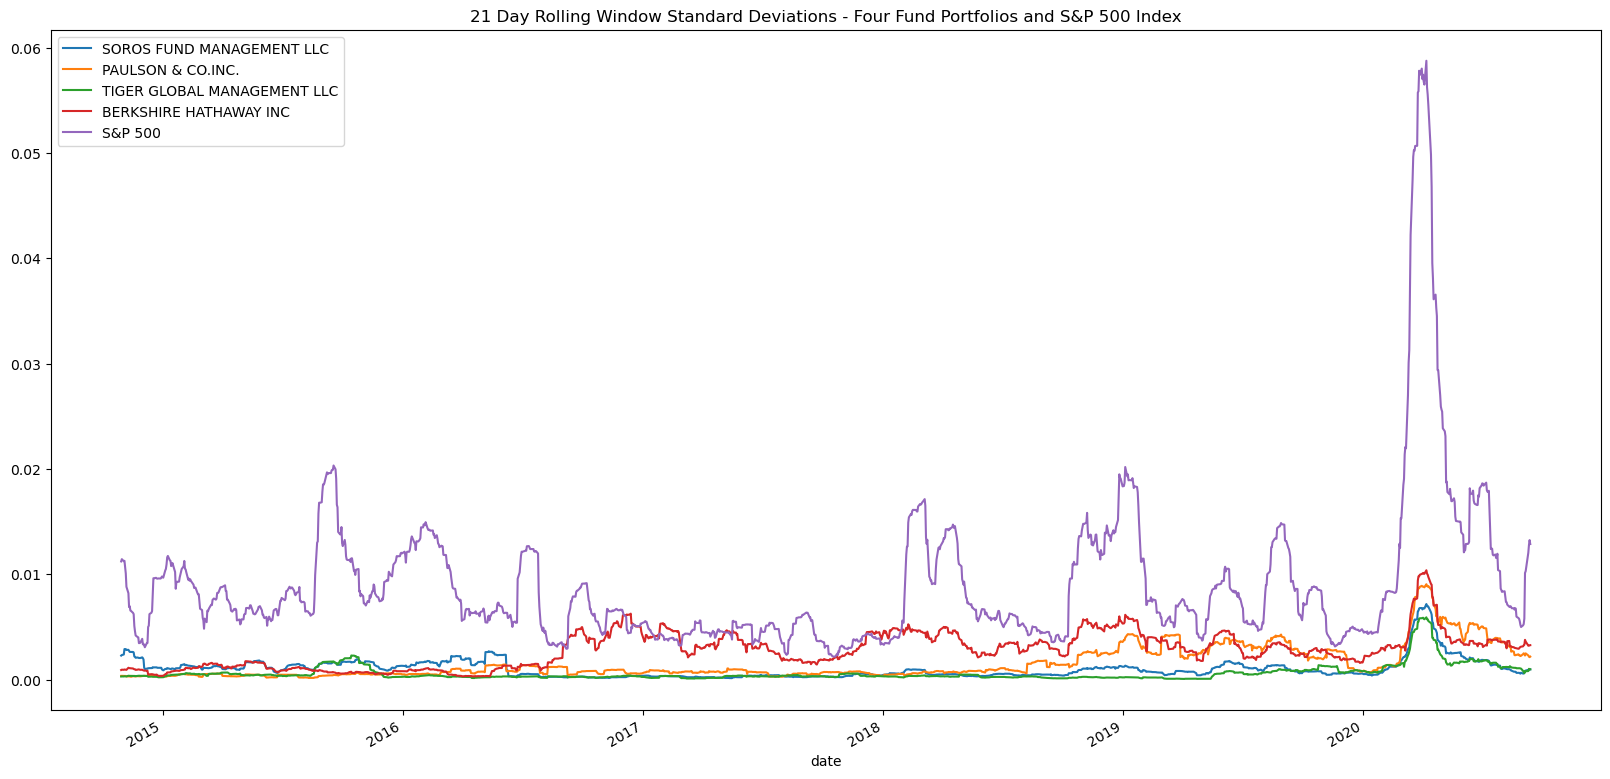

In [39]:
# Using daily returns DataFrame and 21-day rolling window, plot rolling standard deviation of 4 portfolios and S&P 500
# Include a title parameter and adjust the figure size
whale_navs_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Window Standard Deviations - Four Fund Portfolios and S&P 500 Index")



#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21 Day Rolling Window Standard Deviations - Four Fund Portfolios'}, xlabel='date'>

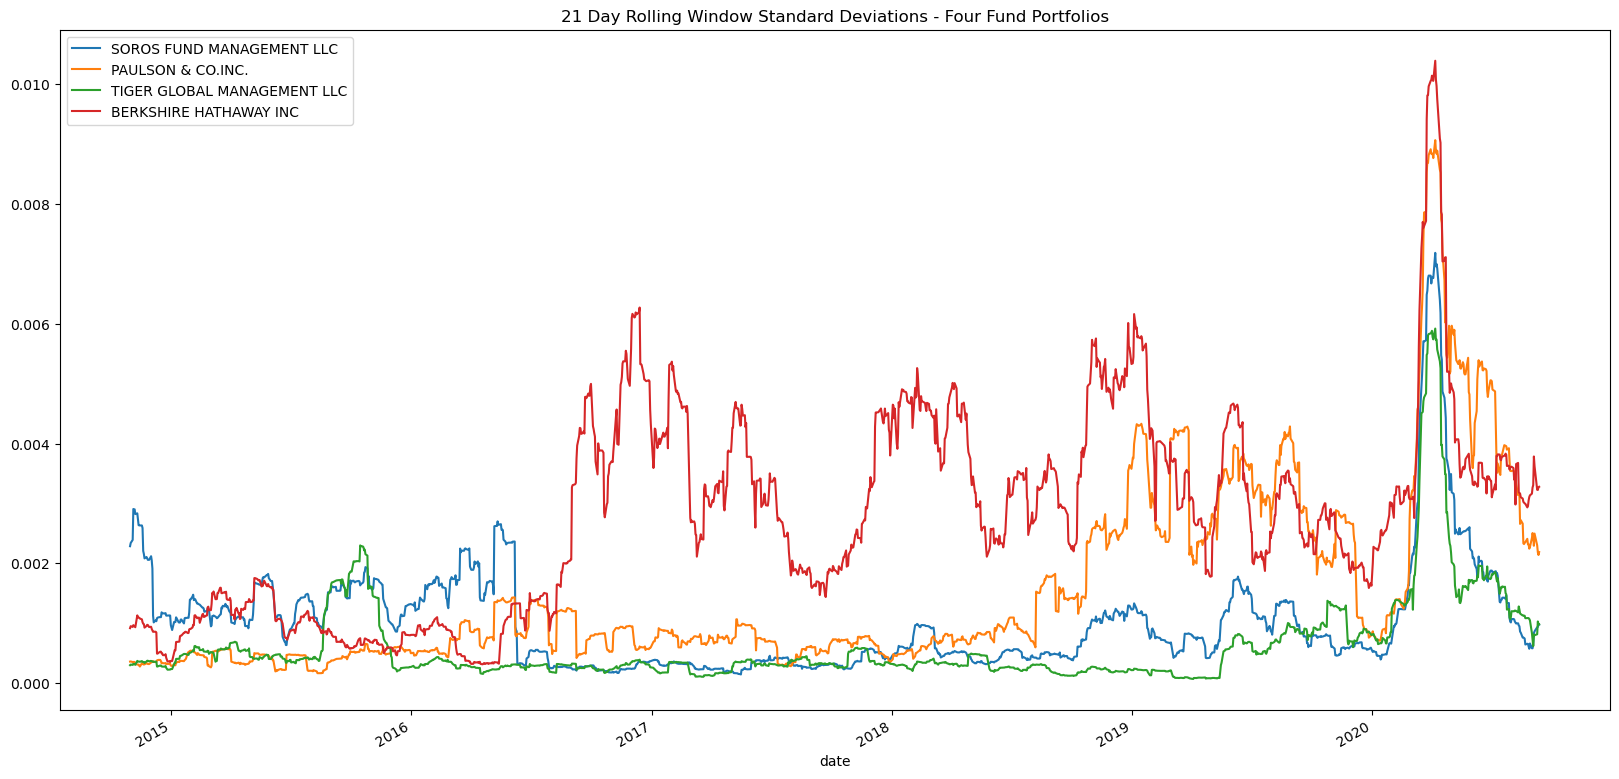

In [40]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
four_fund_portfolios_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Window Standard Deviations - Four Fund Portfolios")


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** Based on the annualized standard deviation, no other portfolios pose more risk than the S&P 500. The S&P 500 has the highest value standard deviation by far, which tells us it is the highest risk option. 

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** 
Based on the rolling metrics, none of the stocks seem to correlate with the S&P 500 except for very early on and not until around mid and late 2016. Early on, Soros Fund Management seems to correlate with the S&P 500 with the risk going down, and in mid 2016 Soros Fund Management again seems to pick up a little risk in correlation with the S&P 500 then drops back down. Berkshire Hathaway's risk in late 2016 seems to increase with the S&P 500's risk, it even shows as MORE risky than the S&P 500 around early 2017 and 2018, and is the only portfolio to do so for the entire time period. 
    After early 2018 it seems that Berkshire Hathaway's risk isn't affected by the S&P 500 until late 2018. During late 2018 we can also see that Paulson and Co's risk seems to correlate with the S&P 500 risk same as Berkshire Hathaway's, but their increases aren't as extreme as the S&P 500 increases. 
    In 2019 there are multiple times where Paulson and Co's risk is higher than Berkshire Hathaway's, although both stocks during 2019 don't seem too affected by the S&P 500, very subtle rises here and there. Early 2020 is when we can see that all the stocks risk's correlate and increase with the S&P 500 going into late 2020. It is the highest point of risk for all four fund portfolios and ESPECIALLY the S&P 500. I believe the 2020 coronavirus pandemic and the affect it had on the world/US economy certainly plays a huge role in the output of that data. 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Based on the rolling standard deviatons of only the four fund portfolios, I think it is safe to say that overall, the Berkshire Hathaway portfolio poses the most risk, mostly from mid 2016-early 2019. When we look at all the data in the prior available timelines, overall the Soros Fund Management portfolio seems to pose the most risk with the Tiger Global Management portfolio having the most risk once, and Berkshire once or twice as well, but these levels of risk are not nearly as large as Berkshire's from mid 2016-early 2019. From early 2019-late 2019, there are a few times where the Paulson & Co portfolio poses more risk than Berkshire Hathaway, and going into 2020 same as we saw with the rolling metrics, all the four fund portfolio's risk skyrockets, with Berkshire Hathaway taking the crown. Once the increase trend starts to decrease, Paulson poses more risk than Berkshire but not for long. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [41]:
# Calculate annual average return data for the four fund portfolios and S&P 500
# Use 252 as number of trading days in the year
# Review annual average returns sorted from lowest to highest
annual_average_return_full_df = whale_navs_daily_returns_df.mean() * 252
annual_average_return_full_df.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [42]:
# Calculate annualized Sharpe Ratios for each of the 4 portfolios and S&P 500
# Review Sharpe ratios sorted lowest to highest
whale_navs_sharpe_ratios = annual_average_return_full_df / whale_navs_annualized_std_df
whale_navs_sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SOROS FUND MANAGEMENT LLC'),
  Text(1, 0, 'PAULSON & CO.INC.'),
  Text(2, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
  Text(3, 0, 'BERKSHIRE HATHAWAY INC'),
  Text(4, 0, 'S&P 500')])

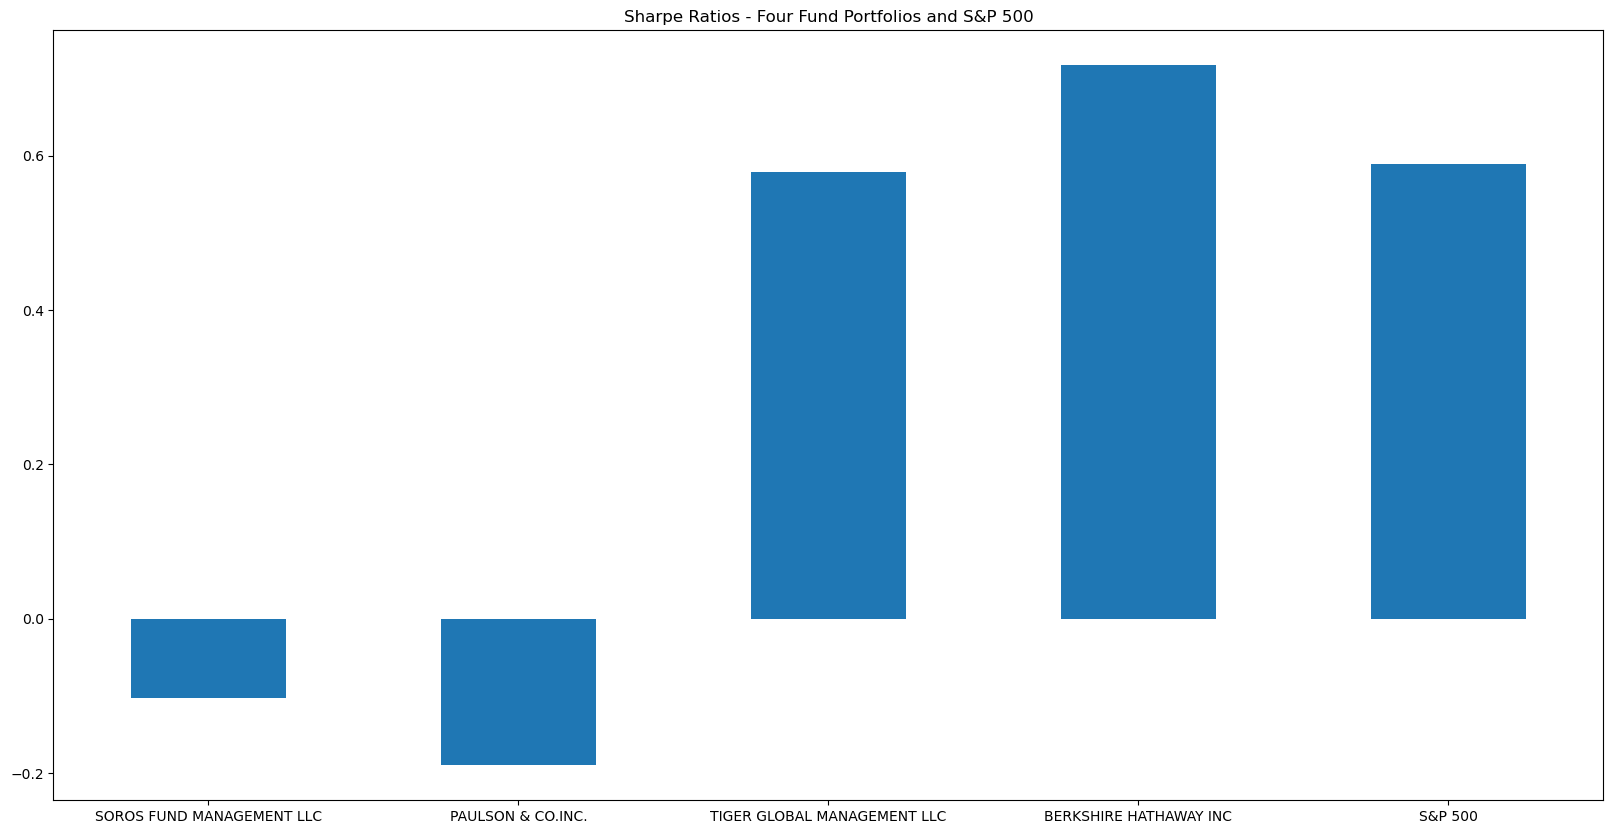

In [45]:
# Visualize Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
whale_navs_sharpe_ratios.plot(figsize=(20,10), kind="bar", title="Sharpe Ratios - Four Fund Portfolios and S&P 500")
plt.xticks(rotation=0)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Based on the sharpe ratios both numerical and visually, the Berkshire Hathaway Inc. portfolio offers the best risk-return profile of all the profiles. We know that with sharpe ratios the higher the value the better the risk return profile, and in this case Berkshire Hathaway takes the crown. The portfolio with the lowest sharpe ratio value is Paulson & Co.Inc. giving it the worst risk return profile. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

---------------------------


<AxesSubplot:title={'center':'Tail Data for S&P Variance w/ 60 Day Rolling Window'}, xlabel='date'>

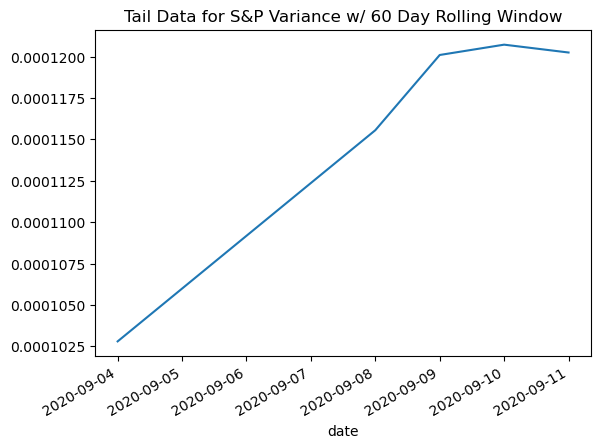

In [61]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
s_and_p_var = whale_navs_daily_returns_df["S&P 500"].rolling(window=60).var()
display(s_and_p_var.tail())
print("---------------------------")
display(s_and_p_var.tail().plot(title="Tail Data for S&P Variance w/ 60 Day Rolling Window"))

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [63]:
# Calculate the covariance using a 60-day rolling window for Berkshire Portfolio
# Review the last five rows of the covariance data
berk_sp_cov = whale_navs_daily_returns_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_navs_daily_returns_df["S&P 500"])
berk_sp_cov.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [67]:
# Calculate the covariance using a 60-day rolling window for Tiger Portfolio
# Review the last five rows of the covariance data
tig_sp_cov = whale_navs_daily_returns_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whale_navs_daily_returns_df["S&P 500"])
tig_sp_cov.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [73]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500) for Berkshire Portfolio
# Review the last five rows of the beta information
berk_beta = berk_sp_cov / (whale_navs_daily_returns_df["S&P 500"]).var()
berk_beta.tail()

date
2020-09-04    0.160205
2020-09-08    0.175904
2020-09-09    0.177044
2020-09-10    0.178787
2020-09-11    0.179769
dtype: float64

In [74]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500) for Tiger Portfolio
# Review the last five rows of the beta information
tig_beta = tig_sp_cov / (whale_navs_daily_returns_df["S&P 500"]).var()
tig_beta.tail()

date
2020-09-04    0.062471
2020-09-08    0.066421
2020-09-09    0.071648
2020-09-10    0.073249
2020-09-11    0.073362
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [77]:
# Calculate the average of the 60-day rolling beta for Berkshire Portfolio
berk_beta_avg = berk_beta.mean()
berk_beta_avg

0.17426441070579793

In [78]:
# Calculate the average of the 60-day rolling beta for Tiger Portfolio
tig_beta_avg = tig_beta.mean()
tig_beta_avg

0.05788619551554748

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60 Day Rolling Beta - Berkshire Hathaway Inc'}, xlabel='date'>

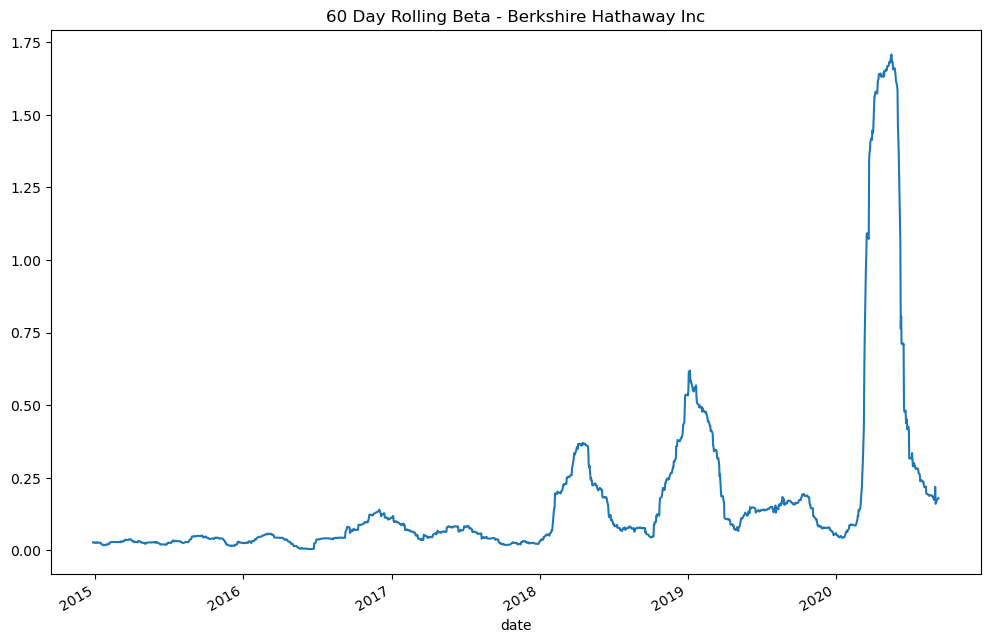

In [82]:
# Plot the rolling beta for Berkshire Portfolio
# Include a title parameter and adjust the figure size
berk_beta.plot(figsize=(12,8), title="60 Day Rolling Beta - Berkshire Hathaway Inc")


<AxesSubplot:title={'center':'60 Day Rolling Beta - Tiger Global Management LLC'}, xlabel='date'>

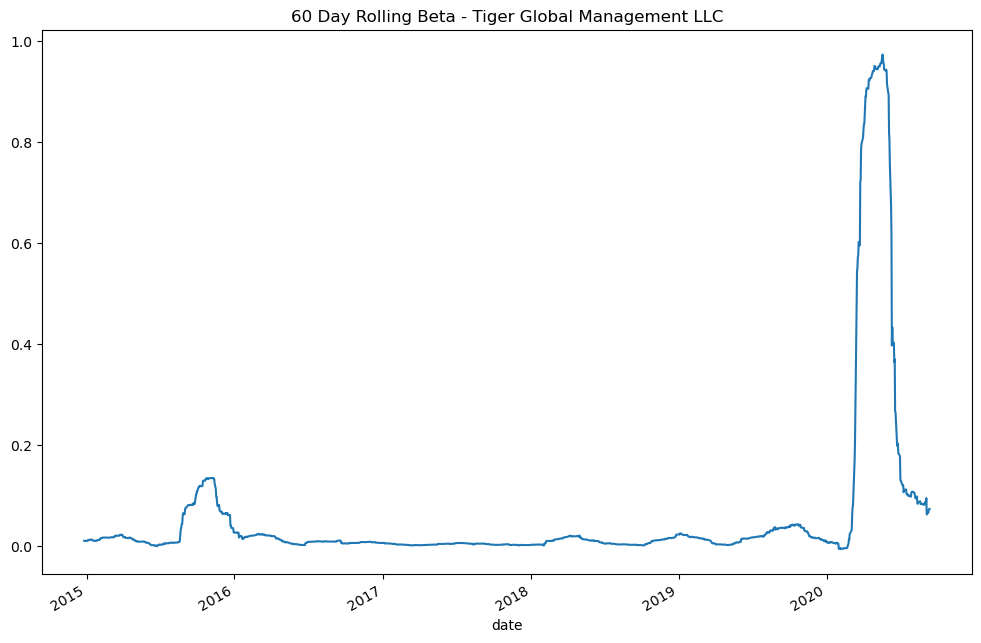

In [83]:
# Plot the rolling beta for Tiger Portfolio
# Include a title parameter and adjust the figure size
tig_beta.plot(figsize=(12,8), title="60 Day Rolling Beta - Tiger Global Management LLC")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [ ]:
# Calculate the covariance using a 60-day rolling window for Berkshire Portfolio
# Review the last five rows of the covariance data
# YOUR CODE HERE


In [ ]:
# Calculate the covariance using a 60-day rolling window for Tiger Portfolio
# Review the last five rows of the covariance data

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500) for Berkshire Portfolio
# Review the last five rows of the beta information
# YOUR CODE HERE


In [ ]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500) for Tiger Portfolio
# Review the last five rows of the beta information

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [ ]:
# Calculate the average of the 60-day rolling beta for Berkshire Portfolio
# YOUR CODE HERE


In [ ]:
# Calculate the average of the 60-day rolling beta for Tiger Portfolio

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [ ]:
# Plot the rolling beta for Berkshire Portfolio
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


In [ ]:
# Plot the rolling beta for Tiger Portfolio
# Include a title parameter and adjust the figure size

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---